In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [342]:
train = pd.read_parquet('train.parquet', engine='pyarrow')
test = pd.read_parquet('test.parquet', engine='pyarrow')

### Exploratory Data Analysis

In [343]:
train.head(10)

,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,survived,ticket
199,-1,C,-1,Unknown,0,15.245800,Unknown,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,2661
706,12,C,-1,Unknown,0,11.241700,Unknown,"Nicola-Yarred, Master. Elias",0,2,0,1,1,2651
555,18,Unknown,-1,Unknown,2,13.000000,"Kontiolahti, Finland / Detroit, MI","Hiltunen, Miss. Marta",1,1,1,1,0,250650
382,37,Unknown,-1,Unknown,2,9.587500,Unknown,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,4135
316,41,Unknown,-1,Unknown,2,39.687500,Unknown,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,3101295
1165,55,Unknown,201,Unknown,2,8.050000,Unknown,"Meo, Mr. Alfonzo",0,2,0,0,0,A.5. 11206
754,32,D,-1,Unknown,2,15.850000,"Ruotsinphytaa, Finland New York, NY","Backstrom, Mr. Karl Alfred",0,2,0,1,0,3101278
1030,43,Unknown,-1,Unknown,2,6.450000,Unknown,"Holm, Mr. John Fredrik Alexander",0,2,0,0,0,C 7075
715,50,4,-1,C80,0,211.500000,"Elkins Park, PA","Widener, Mrs. George Dunton (Eleanor Elkins)",1,0,1,1,1,113503
56,52,4,-1,D20,0,78.266701,"Haverford, PA","Stephenson, Mrs. Walter Bertram (Martha Eustis)",0,0,1,1,1,36947


In [344]:
print('Train set: {} observations, {} features\n'.format(train.shape[0],train.shape[1]))
print('Test set: {} observations, {} features'.format(test.shape[0],test.shape[1]))

Train set: 1047 observations, 14 features

Test set: 262 observations, 14 features


In [345]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 199 to 225
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1047 non-null   int64  
 1   boat       1047 non-null   object 
 2   body       1047 non-null   int32  
 3   cabin      1047 non-null   object 
 4   embarked   1047 non-null   int64  
 5   fare       1047 non-null   float32
 6   home.dest  1047 non-null   object 
 7   name       1047 non-null   object 
 8   parch      1047 non-null   int32  
 9   pclass     1047 non-null   int64  
 10  sex        1047 non-null   int64  
 11  sibsp      1047 non-null   int32  
 12  survived   1047 non-null   int64  
 13  ticket     1047 non-null   object 
dtypes: float32(1), int32(3), int64(5), object(5)
memory usage: 106.3+ KB


In [346]:
train.isna().sum()

age          0
boat         0
body         0
cabin        0
embarked     0
fare         0
home.dest    0
name         0
parch        0
pclass       0
sex          0
sibsp        0
survived     0
ticket       0
dtype: int64

### Metodology:




**Lets take a look first on categorical variables.**

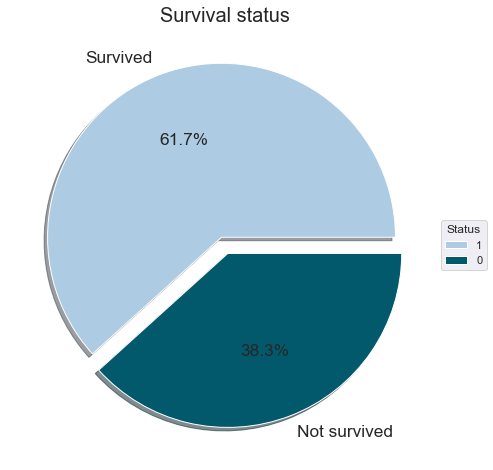

In [347]:
plt.rcParams['figure.figsize'] = [8, 8]
values= train['survived'].value_counts() / train.shape[0]
labels=['Survived', 'Not survived']
plt.pie(values,labels=labels, 
               explode=[0.05, 0.05], 
               colors = ['#adcbe3','#03596c'], 
               autopct='%.1f%%',  
               shadow=True,
               textprops={'size': 'x-large'})
plt.title('Survival status',fontdict = {'fontsize' : 20})
plt.legend(train['survived'].unique(),title='Status',loc='center',bbox_to_anchor=(0.8,0,0.5,1))
plt.show()

***This function will check if the name of a passanger contain one of the given titles in a list of titles.
If a name contain one of the women or men titles it will be replaced by value "Female"/"Male" respectively.***

In [348]:
male_titles  = ['Master', 'Mr.', 'Rev.', 'Col.', 'Don.', 'Sir.', 'Capt.', 'Dr.']
female_titles = ['Miss.', 'Mrs.', 'Ms.', 'Mme.', 'Mlle.', 'Countess']

def replace_if_contain(dataset, column, values, value_to_replace):    
    new_col='_'+column+'_'
    for i in range(len(values)):       
        dataset.loc[(dataset[column].str.contains(values[i],regex=False)), new_col]=value_to_replace
    

replace_if_contain(train, 'name', male_titles, 'Male')
replace_if_contain(train, 'name', female_titles, 'Female') 

train.rename(columns = {'_name_':'_sex_'}, inplace = True)    
train.head(10)


,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,survived,ticket,_sex_
199,-1,C,-1,Unknown,0,15.245800,Unknown,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,2661,Male
706,12,C,-1,Unknown,0,11.241700,Unknown,"Nicola-Yarred, Master. Elias",0,2,0,1,1,2651,Male
555,18,Unknown,-1,Unknown,2,13.000000,"Kontiolahti, Finland / Detroit, MI","Hiltunen, Miss. Marta",1,1,1,1,0,250650,Female
382,37,Unknown,-1,Unknown,2,9.587500,Unknown,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,4135,Female
316,41,Unknown,-1,Unknown,2,39.687500,Unknown,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,3101295,Female
1165,55,Unknown,201,Unknown,2,8.050000,Unknown,"Meo, Mr. Alfonzo",0,2,0,0,0,A.5. 11206,Male
754,32,D,-1,Unknown,2,15.850000,"Ruotsinphytaa, Finland New York, NY","Backstrom, Mr. Karl Alfred",0,2,0,1,0,3101278,Male
1030,43,Unknown,-1,Unknown,2,6.450000,Unknown,"Holm, Mr. John Fredrik Alexander",0,2,0,0,0,C 7075,Male
715,50,4,-1,C80,0,211.500000,"Elkins Park, PA","Widener, Mrs. George Dunton (Eleanor Elkins)",1,0,1,1,1,113503,Female
56,52,4,-1,D20,0,78.266701,"Haverford, PA","Stephenson, Mrs. Walter Bertram (Martha Eustis)",0,0,1,1,1,36947,Female


***From the restoration above, of original values seems like value 0 in column "sex" is a man and value 1 is a women.***

In [349]:
print('Distribution of Varibale "Sex" before: ')   
print(train['sex'].value_counts())
print()
print('Distribution of Varibale "Sex" after: ')   
print(train['_sex_'].value_counts())
print()

Distribution of Varibale "Sex" before: 
0    677
1    370
Name: sex, dtype: int64

Distribution of Varibale "Sex" after: 
Male      678
Female    369
Name: _sex_, dtype: int64



In [350]:
train.loc[train['sex']==1, '_sex_']='Female'
train.loc[train['sex']==0, '_sex_']='Male'

In [351]:
train.head()

,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,survived,ticket,_sex_
199,-1,C,-1,Unknown,0,15.2458,Unknown,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,2661,Male
706,12,C,-1,Unknown,0,11.2417,Unknown,"Nicola-Yarred, Master. Elias",0,2,0,1,1,2651,Male
555,18,Unknown,-1,Unknown,2,13.0000,"Kontiolahti, Finland / Detroit, MI","Hiltunen, Miss. Marta",1,1,1,1,0,250650,Female
382,37,Unknown,-1,Unknown,2,9.5875,Unknown,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,4135,Female
316,41,Unknown,-1,Unknown,2,39.6875,Unknown,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,3101295,Female


0    646
1    401
Name: survived, dtype: int64

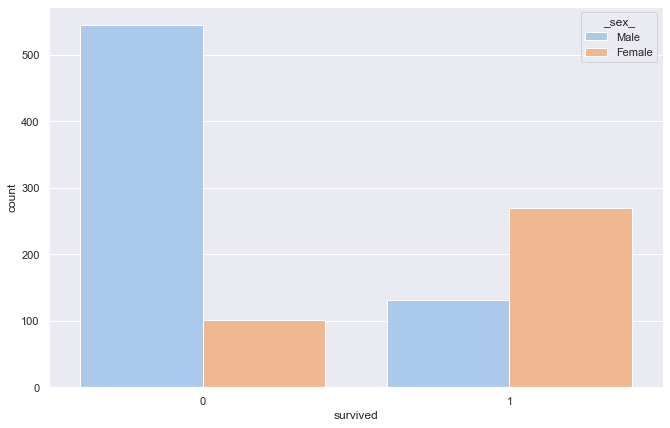

In [352]:
sns.set(rc={"figure.figsize":(11, 7)})
sns.countplot(data=train, x='survived', hue = '_sex_',  palette='pastel')
train['survived'].value_counts()

In [353]:
def missing_pct_calc(data, variable):        
    missing_pct = data[data[variable]=='Unknown'][variable].count() / data.shape[0] * 100
    print('The variable "{}" have {}% of missing values.\n'.format(variable, round(missing_pct,2)))


categorical_vars = ['boat', 'cabin', 'home.dest']
for i in range(len(categorical_vars)):
    missing_pct_calc(train, categorical_vars[i])


The variable "boat" have 62.56% of missing values.

The variable "cabin" have 78.32% of missing values.

The variable "home.dest" have 42.31% of missing values.



In [354]:
check= train.copy()
check.loc[check['boat']!='Unknown', 'boat'] = 1
check.loc[train['boat']=='Unknown', 'boat'] = 0
check['boat']=pd.to_numeric(check['boat'])
check[['boat', 'survived']].corr()

,boat,survived
boat,1.000000,0.949421
survived,0.949421,1.000000


***The column "boat" have a strong correlation with the label ("survived"). It make a sense since someone who have got into the boat most likely have survived.***

***I will drop columns like "cabin" and "ticket" which represent some Id number of a cabin in Titanic and ticket number, also I will drop "home.dest" column which represent 
the destination port of each pasanger. This three columns are useless from  surviveness prediction perspective.***

***The column "body" is also fully correlated with the label ("survived"), as I can see from below check, where the column "body" is not missing (meens that the body was found I assume), there are only unsurvived pasangers. Which is obvious because if the body has been found , there are no chanses that the passanger is survived. These column may be a good predictor for a models I'm going to build.*** 


In [355]:
train = train.drop(['ticket'], axis=1)
train = train.drop(['cabin'], axis=1)
train = train.drop(['home.dest'], axis=1)

In [356]:
train[train['body']!=-1]['survived'].value_counts()

0    94
Name: survived, dtype: int64

In [357]:
train.head(10)

,age,boat,body,embarked,fare,name,parch,pclass,sex,sibsp,survived,_sex_
199,-1,C,-1,0,15.245800,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,Male
706,12,C,-1,0,11.241700,"Nicola-Yarred, Master. Elias",0,2,0,1,1,Male
555,18,Unknown,-1,2,13.000000,"Hiltunen, Miss. Marta",1,1,1,1,0,Female
382,37,Unknown,-1,2,9.587500,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,Female
316,41,Unknown,-1,2,39.687500,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,Female
1165,55,Unknown,201,2,8.050000,"Meo, Mr. Alfonzo",0,2,0,0,0,Male
754,32,D,-1,2,15.850000,"Backstrom, Mr. Karl Alfred",0,2,0,1,0,Male
1030,43,Unknown,-1,2,6.450000,"Holm, Mr. John Fredrik Alexander",0,2,0,0,0,Male
715,50,4,-1,0,211.500000,"Widener, Mrs. George Dunton (Eleanor Elkins)",1,0,1,1,1,Female
56,52,4,-1,0,78.266701,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",0,0,1,1,1,Female


### Feature Transformation

***The following function will transform predictor: "body" and "boat" to binary predictors with values 0 or 1. If the value is missing, 0 will be inserted, otherwise 1.***

In [358]:
cols=['boat', 'body']

def make_binary(dataset, columns, drop_orig=True):
    for col in columns:
        new_col='_'+col+'_'
        if dataset.dtypes[col] in ['int32', 'int64']:
            dataset.loc[(dataset[col]==-1), new_col]=0
            dataset.loc[(dataset[col]!=-1), new_col]=1
        else:
            dataset.loc[(dataset[col]=='Unknown'), new_col]=0
            dataset.loc[(dataset[col]!='Unknown'), new_col]=1
            
        if drop_orig:
            dataset = dataset.drop([col], axis=1)

    return dataset

train=make_binary(train, cols)
train

,age,embarked,fare,name,parch,pclass,sex,sibsp,survived,_sex_,_boat_,_body_
199,-1,0,15.2458,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,Male,1.0,0.0
706,12,0,11.2417,"Nicola-Yarred, Master. Elias",0,2,0,1,1,Male,1.0,0.0
555,18,2,13.0000,"Hiltunen, Miss. Marta",1,1,1,1,0,Female,0.0,0.0
382,37,2,9.5875,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,Female,0.0,0.0
316,41,2,39.6875,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,Female,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
878,50,2,10.5000,"Ridsdale, Miss. Lucy",0,1,1,0,1,Female,1.0,0.0
283,4,2,22.0250,"Kink-Heilmann, Miss. Luise Gretchen",2,2,1,0,1,Female,1.0,0.0
797,32,2,10.5000,"Jenkin, Mr. Stephen Curnow",0,1,0,0,0,Male,0.0,0.0
1300,21,2,11.5000,"Cotterill, Mr. Henry 'Harry'",0,1,0,0,0,Male,0.0,0.0


In [359]:
train2= train.copy()
p_class = sorted(list(train2['pclass'].value_counts().index))

for i in range(len(p_class)):
    male_median=train2[(train2['_sex_']=='Male') & (train2['pclass']==p_class[i])]['age'].median()
    female_median=train2[(train2['_sex_']=='Female') & (train2['pclass']==p_class[i])]['age'].median()   
    print('For pclass {pclass} the median age of female is {f_age} and the median age of male is {m_age}'
           .format(pclass=p_class[i], f_age=female_median, m_age=male_median))
      

For pclass 0 the median age of female is 33.0 and the median age of male is 38.0
For pclass 1 the median age of female is 26.0 and the median age of male is 28.0
For pclass 2 the median age of female is 16.0 and the median age of male is 21.0


In [360]:
train2.groupby(["_sex_", "survived", "pclass",])["age"].median()

_sex_   survived  pclass
Female  0         0         25.0
                  1         26.5
                  2         18.0
        1         0         33.0
                  1         25.5
                  2         15.0
Male    0         0         39.0
                  1         29.0
                  2         21.0
        1         0         35.5
                  1          5.5
                  2         21.0
Name: age, dtype: float64

<AxesSubplot:>

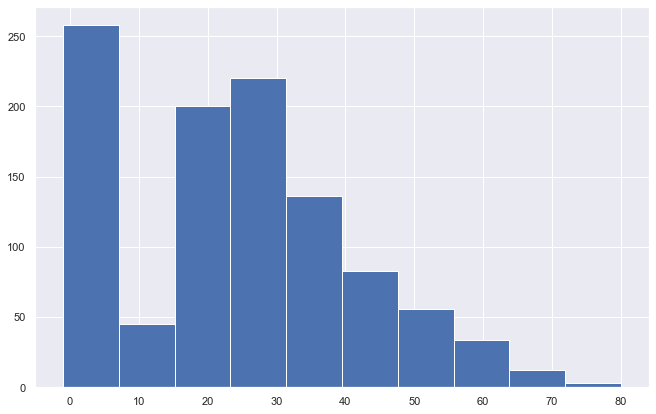

In [361]:
sns.set(rc={"figure.figsize":(11, 7)})
train['age'].hist()

### Imputer

In [362]:
train['_age_'] = train['age']

train.loc[(train['age']==-1) & (train['_sex_']=='Female') & (train['survived']==0) & (train['pclass']==0), '_age_'] =25.0
train.loc[(train['age']==-1) & (train['_sex_']=='Female') & (train['survived']==0) & (train['pclass']==1), '_age_'] =26.5
train.loc[(train['age']==-1) & (train['_sex_']=='Female') & (train['survived']==0) & (train['pclass']==2), '_age_'] =18.0
train.loc[(train['age']==-1) & (train['_sex_']=='Female') & (train['survived']==1) & (train['pclass']==0), '_age_'] =33.0
train.loc[(train['age']==-1) & (train['_sex_']=='Female') & (train['survived']==1) & (train['pclass']==1), '_age_'] =25.5
train.loc[(train['age']==-1) & (train['_sex_']=='Female') & (train['survived']==1) & (train['pclass']==2), '_age_'] =15.0


train.loc[(train['age']==-1) & (train['_sex_']=='Male') & (train['survived']==0) & (train['pclass']==0), '_age_'] =39.0
train.loc[(train['age']==-1) & (train['_sex_']=='Male') & (train['survived']==0) & (train['pclass']==1), '_age_'] =29.0
train.loc[(train['age']==-1) & (train['_sex_']=='Male') & (train['survived']==0) & (train['pclass']==2), '_age_'] =21.0
train.loc[(train['age']==-1) & (train['_sex_']=='Male') & (train['survived']==1) & (train['pclass']==0), '_age_'] =35.5
train.loc[(train['age']==-1) & (train['_sex_']=='Male') & (train['survived']==1) & (train['pclass']==1), '_age_'] =5.5
train.loc[(train['age']==-1) & (train['_sex_']=='Male') & (train['survived']==1) & (train['pclass']==2), '_age_'] =21.0

train = train.drop(['age'], axis=1)

<AxesSubplot:>

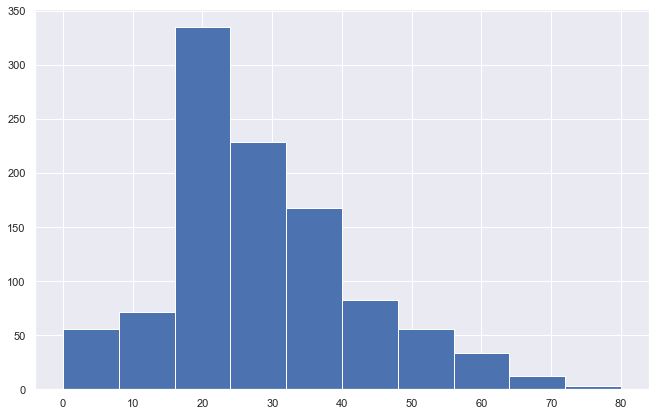

In [363]:
train['_age_'].hist()

0    646
1    401
Name: survived, dtype: int64

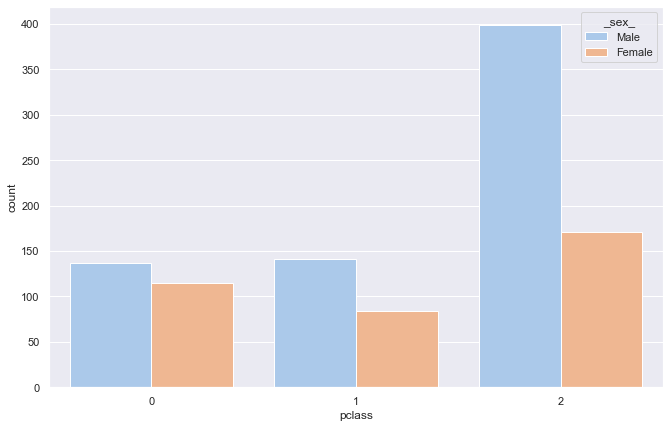

In [364]:
sns.countplot(data=train, x='pclass', hue = '_sex_',  palette='pastel')
train['survived'].value_counts()

<AxesSubplot:xlabel='fare', ylabel='Count'>

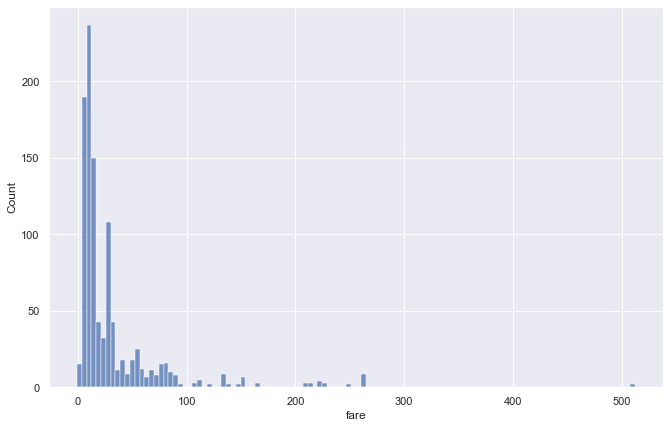

In [365]:
sns.histplot(data=train, x="fare")

### Feature engineering

In [366]:
def create_new_features(dataset):
      
    dataset['_decile_of_fare_']= pd.qcut(dataset['fare'], q = 10, labels = False)
    dataset.loc[(dataset['_decile_of_fare_']>=8), '_social_class_'] ="Rich"
    dataset.loc[(dataset['_decile_of_fare_']>=4) & (dataset['_decile_of_fare_']< 8), '_social_class_'] ="Middle class"
    dataset.loc[(dataset['_decile_of_fare_']< 4), '_social_class_'] ="Poor"

    dataset.loc[(dataset['_age_']<= 4), '_group_'] ="Child"
    dataset.loc[(dataset['_age_']>  4) & (dataset['_age_']<= 13) & (dataset['_sex_']=='Male'),'_group_'] ="Boy"
    dataset.loc[(dataset['_age_']>  4) & (dataset['_age_']<= 13) & (dataset['_sex_']=='Female'),'_group_'] ="Girl"
    dataset.loc[(dataset['_age_']> 13) & (dataset['_age_']<= 18),'_group_'] ="Teenager"
    dataset.loc[(dataset['_age_']> 18) & (dataset['_age_']<= 30) & (dataset['_sex_']=='Male'),'_group_'] ="Young Man"
    dataset.loc[(dataset['_age_']> 18) & (dataset['_age_']<= 30) & (dataset['_sex_']=='Female'),'_group_'] ="Young Women"
    dataset.loc[(dataset['_age_']> 30) & (dataset['_age_']<= 55) & (dataset['_sex_']=='Male'),'_group_'] ="Man"
    dataset.loc[(dataset['_age_']> 30) & (dataset['_age_']<= 55) & (dataset['_sex_']=='Female'),'_group_'] ="Women"
    dataset.loc[(dataset['_age_']> 55) & (dataset['_sex_']=='Male'),'_group_'] ="Old Man"
    dataset.loc[(dataset['_age_']> 55) & (dataset['_sex_']=='Female'),'_group_'] ="Old Women"


    dataset['_family_members_total_']= dataset['parch']+dataset['sibsp']
    dataset.loc[(dataset['_family_members_total_'] >6) ,'_big_family_'] = 1
    dataset.loc[(dataset['_family_members_total_']<=6) ,'_big_family_'] = 0

    return dataset



train = create_new_features(train)
train

,embarked,fare,name,parch,pclass,sex,sibsp,survived,_sex_,_boat_,_body_,_age_,_decile_of_fare_,_social_class_,_group_,_family_members_total_,_big_family_
199,0,15.2458,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,Male,1.0,0.0,21.0,5,Middle class,Young Man,2,0.0
706,0,11.2417,"Nicola-Yarred, Master. Elias",0,2,0,1,1,Male,1.0,0.0,12.0,4,Middle class,Boy,1,0.0
555,2,13.0000,"Hiltunen, Miss. Marta",1,1,1,1,0,Female,0.0,0.0,18.0,4,Middle class,Teenager,2,0.0
382,2,9.5875,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,Female,0.0,0.0,37.0,3,Poor,Women,0,0.0
316,2,39.6875,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,Female,0.0,0.0,41.0,7,Middle class,Women,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,2,10.5000,"Ridsdale, Miss. Lucy",0,1,1,0,1,Female,1.0,0.0,50.0,3,Poor,Women,0,0.0
283,2,22.0250,"Kink-Heilmann, Miss. Luise Gretchen",2,2,1,0,1,Female,1.0,0.0,4.0,6,Middle class,Child,2,0.0
797,2,10.5000,"Jenkin, Mr. Stephen Curnow",0,1,0,0,0,Male,0.0,0.0,32.0,3,Poor,Man,0,0.0
1300,2,11.5000,"Cotterill, Mr. Henry 'Harry'",0,1,0,0,0,Male,0.0,0.0,21.0,4,Middle class,Young Man,0,0.0


0.0    1032
1.0      15
Name: _big_family_, dtype: int64

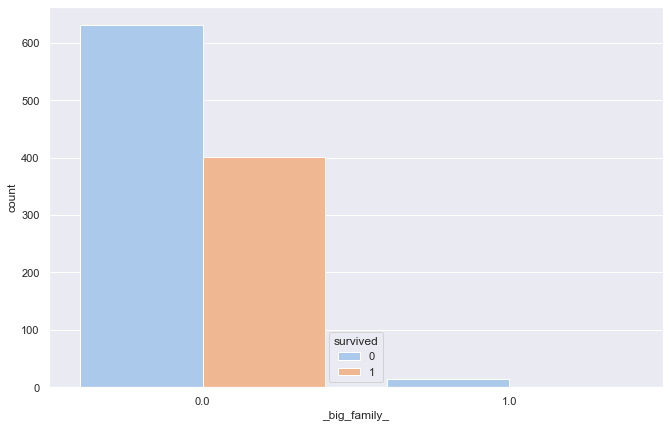

In [367]:
sns.countplot(data=train, x='_big_family_', hue = 'survived',  palette='pastel')
train['_big_family_'].value_counts()

### Preproceccing

***One Hot Encoding:***

In [368]:
from sklearn.preprocessing import OneHotEncoder

categorical_variables = ['_group_', '_social_class_']

train = train.reset_index()

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on categorical variables  
encoder_df = pd.DataFrame(encoder.fit_transform(train[categorical_variables]).toarray(), 
                          columns=list(train['_group_'].unique())+list(train['_social_class_'].unique()))

#merge one-hot encoded columns back with original DataFrame
train = train.join(encoder_df)

#view final df
train.head()



,index,embarked,fare,name,parch,pclass,sex,sibsp,survived,_sex_,...,Women,Man,Young Women,Child,Old Women,Old Man,Girl,Middle class,Poor,Rich
0,199,0,15.2458,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,706,0,11.2417,"Nicola-Yarred, Master. Elias",0,2,0,1,1,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,555,2,13.0000,"Hiltunen, Miss. Marta",1,1,1,1,0,Female,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,382,2,9.5875,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,Female,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,316,2,39.6875,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,Female,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


***Scaling:***

In [369]:
from sklearn.preprocessing import MinMaxScaler

# apply min-max scaling
minmax_scaler = MinMaxScaler(feature_range=(0, 1))

train['_fare_'] = minmax_scaler.fit_transform(train[['fare']])

train = train.drop(['fare'], axis=1)

train.head()

,index,embarked,name,parch,pclass,sex,sibsp,survived,_sex_,_boat_,...,Man,Young Women,Child,Old Women,Old Man,Girl,Middle class,Poor,Rich,_fare_
0,199,0,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,Male,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.031648
1,706,0,"Nicola-Yarred, Master. Elias",0,2,0,1,1,Male,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.023848
2,555,2,"Hiltunen, Miss. Marta",1,1,1,1,0,Female,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.027273
3,382,2,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,Female,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.020625
4,316,2,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,Female,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.079262


### Modeling

In [389]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance



predictors = train.select_dtypes(include=np.number).drop(['survived','index', '_boat_'], axis=1)
predictors = list(predictors.columns)

label = train.survived

X = pd.DataFrame(train, columns=predictors)
y = label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)


rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([2.57094440e-02, 1.33182516e-02, 1.16790826e-01, 2.75119283e-01,
       2.26783392e-02, 2.20721074e-02, 2.48950945e-01, 2.98983379e-02,
       3.06795473e-02, 1.97609713e-04, 2.72161329e-03, 4.57023520e-04,
       1.29104582e-03, 5.40806410e-03, 1.10144216e-03, 1.70147230e-03,
       7.42305544e-03, 1.84367659e-03, 6.54462049e-03, 5.68727666e-03,
       7.96524069e-03, 2.76768804e-03, 2.34118301e-03, 1.67331906e-01])

<BarContainer object of 24 artists>

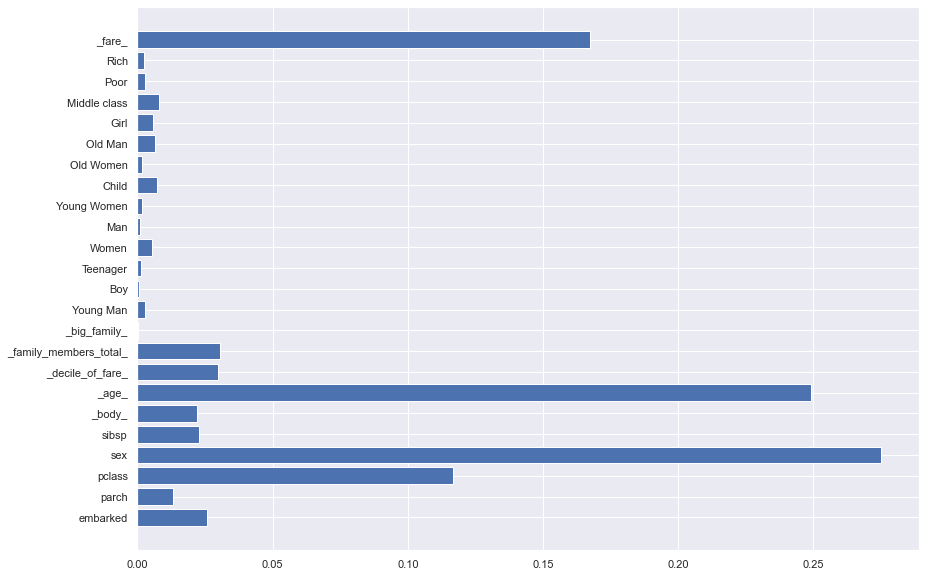

In [390]:
plt.rcParams.update({'figure.figsize': (14.0, 10.0)})
plt.rcParams.update({'font.size': 14})
plt.barh(predictors, rf.feature_importances_)

### Classifiers

In [399]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=1000,
                                 max_depth=10,
                                 random_state=1,
                                 n_jobs=5)

# Fit the model
forest.fit(X_train, y_train)


# Measure model performance
y_pred = forest.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.819


***Hyperparameter tuning***

In [403]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

param_grid = {

    "bootstrap": [True],

    "max_depth": [10*i for i in range(1,11)],

    "max_features": [2, 3],

    "min_samples_leaf": [3, 4, 5],

    "min_samples_split": [8, 10, 12],

    "n_estimators": [100, 200, 300, 1000]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best Hyperparameters
grid_search.best_params_



Fitting 3 folds for each of 720 candidates, totalling 2160 fits
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] 

[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_sam

[CV] END bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=True, max_depth=10, max_features=3, min_sa

[CV] END bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, max_depth=10, max_features=3, min_samples

[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_sa

[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=2, min_

[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   4.2s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_le

[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_sa

[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_

[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_sampl

[CV] END bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=40, max_features=2, min_samp

[CV] END bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=40, max_features=2, min_sa

[CV] END bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=40, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_

[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   3.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_s

[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   3.6s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   3.0s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_

[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=60, max_features=2, min_samples_le

[CV] END bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, max_depth=60, max_features=2, min_sa

[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, max_depth=60, max_features=3, min_

[CV] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   2.7s
[CV] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   3.0s
[CV] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=70, max_features=2, min_sampl

[CV] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   5.0s
[CV] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   2.6s
[CV] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=70, max_features=2, min_samp

[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_sa

[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_le

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_s

[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samp

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_sample

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_sa

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [404]:
best_grid = grid_search.best_estimator_

In [406]:
best_grid

RandomForestRegressor(max_depth=30, max_features=3, min_samples_leaf=3,
                      min_samples_split=8)

### Build Pipline

In [ ]:
def replace_matched_values(dataset, col, new_col, value_to_replace, new_value):
    dataset.loc[dataset[col]==value_to_replace, new_col]=new_value
    return dataset

def drop_columns(dataset, list_of_cols):
    for i in range(len(list_of_cols)):
        dataset = dataset.drop([list_of_cols[i]], axis=1)    
    return dataset

def impute_by_group(dataset, group_by, col):

    cross = pd.DataFrame(dataset.groupby(group_by)[col].median())
    new_col = '_'+col+'_'
    dataset[new_col] = dataset[col]
    for row in range(cross.shape[0]):    
        dataset.loc[(dataset[col]==-1)  
                    &(dataset[group_by[0]]==cross.index[row][0]) 
                    &(dataset[group_by[1]]==cross.index[row][1]) 
                    &(dataset[group_by[2]]==cross.index[row][2]), new_col] = cross.values[row][0]
    return dataset

In [ ]:
class Pipeline:
    
    def __init__(self, dataset):
        self.dataset=dataset
    
    def pipe(self):
        self.dataset= self.dataset\
                          .pipe(replace_matched_values, col='sex', new_col='_sex_', value_to_replace=1, new_value='Female')\
                          .pipe(replace_matched_values, col='sex', new_col='_sex_', value_to_replace=0, new_value='Male')\
                          .pipe(drop_columns, list_of_cols=['cabin', 'home.dest', 'ticket'])\
                          .pipe(impute_by_group, group_by=["_sex_", "survived", "pclass"], col='age')\
                          .pipe(drop_columns, list_of_cols=['age'])\
                          .pipe(make_binary, columns=['body', 'boat'])\
                          .pipe(create_new_features)

        return self.dataset
    
    
    
test =  Pipeline(test).pipe()  
test 